In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from logistic_regression import sigmoid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


data_training = pd.read_csv('train.csv')
x_tr = data_training.drop('diabetes', axis=1)
y_tr = data_training['diabetes']

scaler = StandardScaler()
x_tr = scaler.fit_transform(x_tr)
x_tr = np.hstack([np.ones([x_tr.shape[0],1]), x_tr])

df = pd.read_csv('test.csv')
y_test = df['diabetes']
x_test = df.drop('diabetes', axis=1)
x_test = scaler.transform(x_test)
x_test = np.hstack([np.ones([x_test.shape[0],1]), x_test])


# Gradient Descent

In [3]:
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_json('results/gradient_descent.json')

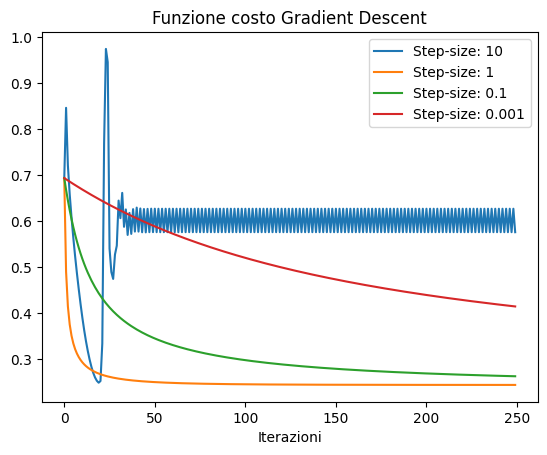

In [4]:
x = np.array(range(0,250))
y = df['value_cost_function'].to_numpy()

# sns.lineplot(df, x='iteration',y='value_cost_function', hue='step' )

# plt.plot(x[0:100],y[0][0:100], label='Step-size: 10')
plt.plot(x,y[0][0:250], label='Step-size: 10')
plt.plot(x,y[1][0:250], label='Step-size: 1')
plt.plot(x,y[2][0:250], label='Step-size: 0.1')
plt.plot(x,y[3][0:250], label='Step-size: 0.001')

plt.title("Funzione costo Gradient Descent")
plt.xlabel('Iterazioni')
plt.legend()
plt.show()


F1 Score sul TRAIN SET: 0.8866796293433782 F1 Score sul TEST SET: 0.887107151695125
Accuracy Score sul TRAIN SET: 0.8863958894054319 Accuracy Score sul TEST SET: 0.8866865375062096


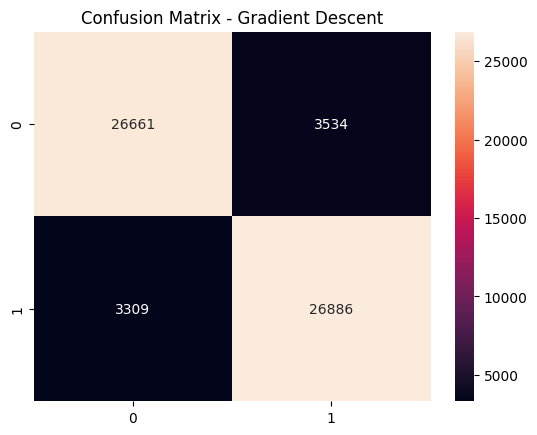

In [5]:
df_ottimo = df[ df['step'] == 0.1]
parametri_ottimi = df_ottimo['value_optimal_parameters'].to_numpy()

y_predicted_train = sigmoid(np.dot(x_tr,*parametri_ottimi)) > 0.5
y_predicted_train = y_predicted_train.astype(int)

y_predicted_test = sigmoid(np.dot(x_test,*parametri_ottimi)) > 0.5
y_predicted_test = y_predicted_test.astype(int)


print(f"F1 Score sul TRAIN SET: {f1_score(y_tr, y_predicted_train)} F1 Score sul TEST SET: {f1_score(y_test, y_predicted_test)}")
print(f"Accuracy Score sul TRAIN SET: {accuracy_score(y_tr, y_predicted_train)} Accuracy Score sul TEST SET: {accuracy_score(y_test, y_predicted_test)}")

conf_matrix = confusion_matrix(y_test, y_predicted_test)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix - Gradient Descent")
plt.show()




# Algoritmo di Newton

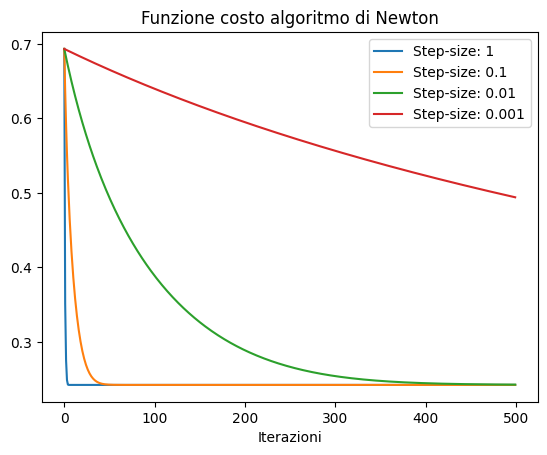

In [6]:
df = pd.read_json('results/newthon_method.json')

x = np.array(range(0,500))
y = df['value_cost_function'].to_numpy()
[1, 0.1, 0.01, 0.001]
plt.plot(x,y[0][0:500], label='Step-size: 1')
plt.plot(x,y[1][0:500], label='Step-size: 0.1')
plt.plot(x,y[2][0:500], label='Step-size: 0.01')
plt.plot(x,y[3][0:500], label='Step-size: 0.001')
plt.title("Funzione costo algoritmo di Newton")
plt.xlabel('Iterazioni')
plt.legend()
plt.show()


F1 Score sul TRAIN SET: 0.8858753569191472 F1 Score sul TEST SET: 0.8869209584590776
Accuracy Score sul TRAIN SET: 0.8855802952450861 Accuracy Score sul TEST SET: 0.8864547110448749


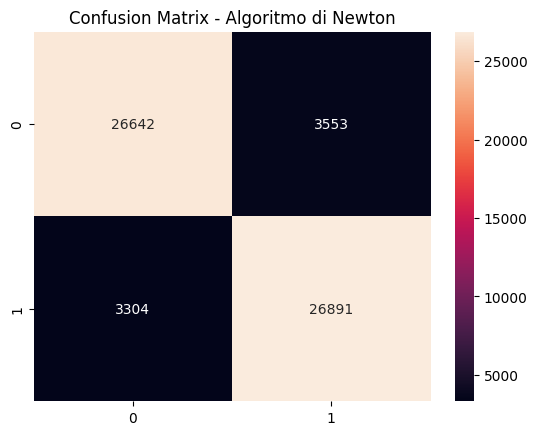

In [7]:
df_ottimo = df[ df['step'] == 0.01]
parametri_ottimi = df_ottimo['value_optimal_parameters'].to_numpy()

y_predicted_train = sigmoid(np.dot(x_tr,*parametri_ottimi)) > 0.5
y_predicted_train = y_predicted_train.astype(int)

y_predicted_test = sigmoid(np.dot(x_test,*parametri_ottimi)) > 0.5
y_predicted_test = y_predicted_test.astype(int)


print(f"F1 Score sul TRAIN SET: {f1_score(y_tr, y_predicted_train)} F1 Score sul TEST SET: {f1_score(y_test, y_predicted_test)}")
print(f"Accuracy Score sul TRAIN SET: {accuracy_score(y_tr, y_predicted_train)} Accuracy Score sul TEST SET: {accuracy_score(y_test, y_predicted_test)}")

conf_matrix = confusion_matrix(y_test, y_predicted_test)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix - Algoritmo di Newton")
plt.show()


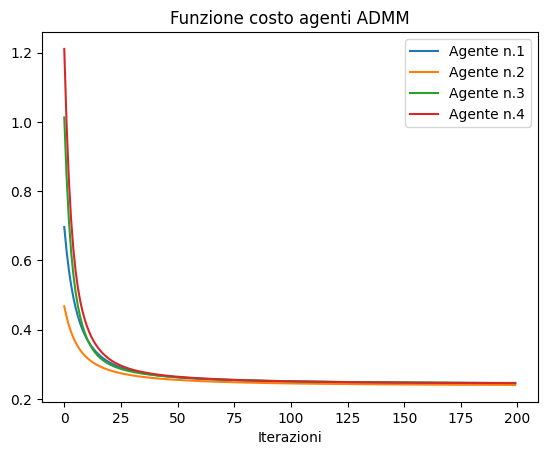

In [19]:
df = pd.read_json('results/ADMM.json')

x = np.array(range(0,200))
y = df['value_cost_function'].to_numpy()

y = y.tolist()[0]
res = np.zeros([4,1000])

for i in range(0,len(y)):
    res[:,i] = y[i]

plt.plot(x,res[0,:200], label='Agente n.1')
plt.plot(x,res[1,:200], label='Agente n.2')
plt.plot(x,res[2,:200], label='Agente n.3')
plt.plot(x,res[3,:200], label='Agente n.4')
plt.title("Funzione costo agenti ADMM")
plt.xlabel('Iterazioni')
plt.legend()
plt.show()

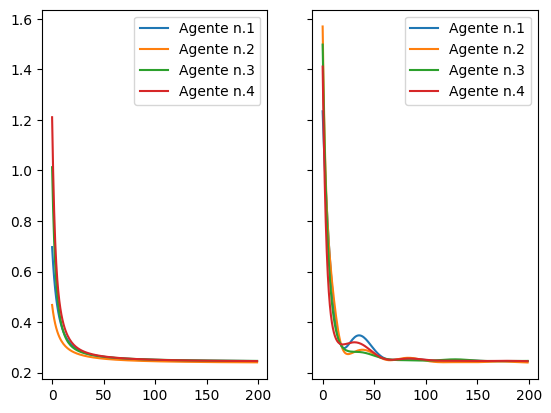

In [20]:
y = df['value_cost_function'].to_numpy()
y = y.tolist()[1]
res_2 = np.zeros([4,1000])

for i in range(0,len(y)):
    res_2[:,i] = y[i]

# Two subplots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x,res[0,:200], label='Agente n.1')
ax1.plot(x,res[1,:200], label='Agente n.2')
ax1.plot(x,res[2,:200], label='Agente n.3')
ax1.plot(x,res[3,:200], label='Agente n.4')
ax1.set_title('Funzione costo ADMM con rho = 0"')
ax1.legend()
ax2.plot(x,res_2[0,:200], label='Agente n.1')
ax2.plot(x,res_2[1,:200], label='Agente n.2')
ax2.plot(x,res_2[2,:200], label='Agente n.3')
ax2.plot(x,res_2[3,:200], label='Agente n.4')
ax2.set_title('Funzione costo ADMM con rho = 0.00001"')

ax2.legend()
plt.show()


In [9]:
df['value_optimal_parameters'].tolist()[0][3]
parametri_agenti = np.zeros([9,5])

for i in range(0,4):
    parametri_agenti[:, i] = df['value_optimal_parameters'].tolist()[0][i]

parametri_agenti[:,4] = df['z'].to_list()[0]


df = pd.DataFrame(parametri_agenti).head(9)
df.columns = ['Agente 1', 'Agente 2', 'Agente 3', 'Agente 4', 'z',]
df

,Agente 1,Agente 2,Agente 3,Agente 4,z
0,-0.022322,0.078974,0.032177,0.032336,0.030291
1,1.270121,1.261999,1.248229,1.204065,1.246103
2,-0.039448,-0.055186,-0.172377,-0.017450,-0.071115
3,-0.060523,-0.068069,-0.094819,-0.050909,-0.068580
4,0.721869,0.733647,0.727917,0.748482,0.732979
5,2.914265,3.024603,2.984565,3.027859,2.987823
6,1.717283,1.804276,1.731076,1.761327,1.753491
7,-0.246558,-0.212512,-0.180629,-0.238106,-0.219451
8,-0.083546,-0.082281,-0.096474,-0.074464,-0.084191


F1 Score sul TRAIN SET: 0.8857445077298616 F1 Score sul TEST SET: 0.8868027255778654
Accuracy Score sul TRAIN SET: 0.8854742680042411 Accuracy Score sul TEST SET: 0.886388474913065


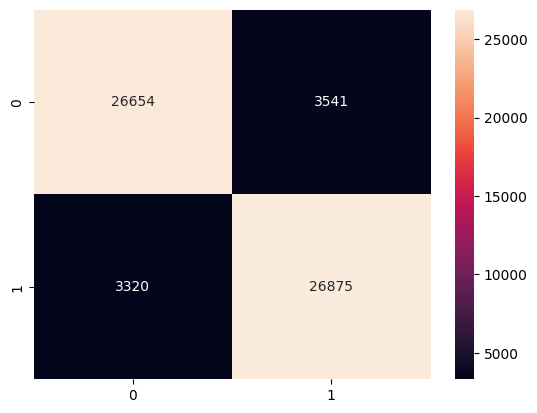

In [10]:
parametri_ottimi = df['z'].to_numpy()

y_predicted_train = sigmoid(np.dot(x_tr,parametri_ottimi)) > 0.5
y_predicted_train = y_predicted_train.astype(int)

y_predicted_test = sigmoid(np.dot(x_test,parametri_ottimi)) > 0.5
y_predicted_test = y_predicted_test.astype(int)


print(f"F1 Score sul TRAIN SET: {f1_score(y_tr, y_predicted_train)} F1 Score sul TEST SET: {f1_score(y_test, y_predicted_test)}")
print(f"Accuracy Score sul TRAIN SET: {accuracy_score(y_tr, y_predicted_train)} Accuracy Score sul TEST SET: {accuracy_score(y_test, y_predicted_test)}")

conf_matrix = confusion_matrix(y_test, y_predicted_test)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()